In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
not_inclueded = ['default', 'loan']

In [5]:
included = df.columns.difference(not_inclueded)
df_base = df[included]

In [6]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
df_base.isna().sum()

age          0
balance      0
campaign     0
contact      0
day          0
duration     0
education    0
housing      0
job          0
marital      0
month        0
pdays        0
poutcome     0
previous     0
y            0
dtype: int64

### Question 1

In [8]:
df.education.mode()

0    secondary
Name: education, dtype: object

### Question 2

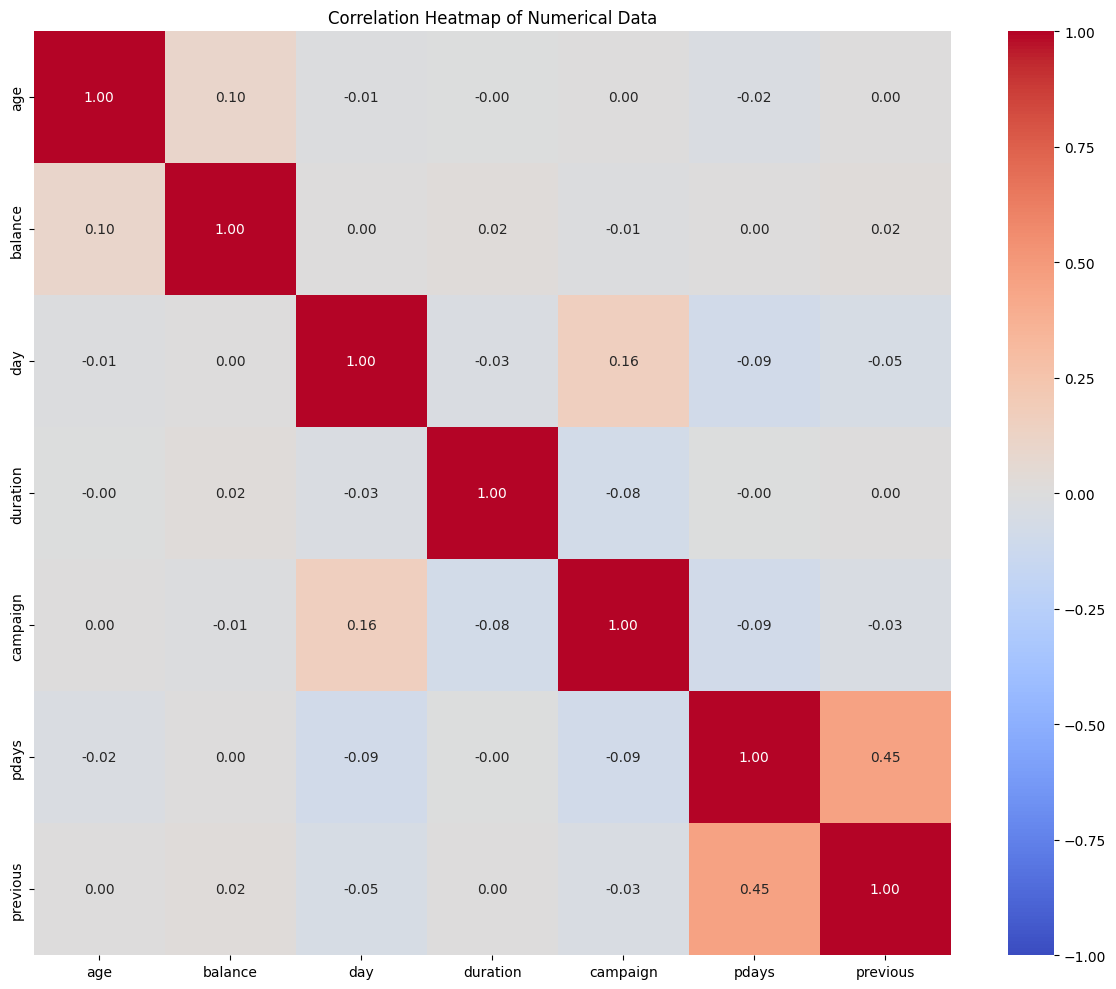

In [12]:

# Assuming your dataframe is named 'df'
# Calculate the correlation matrix
correlation_matrix = df_base[numerical].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap="coolwarm", 
                      vmin=-1, 
                      vmax=1, 
                      center=0,
                      fmt=".2f")

# Set the title
plt.title("Correlation Heatmap of Numerical Data")

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
df_base.y = (df_base.y == 'yes').astype(int)


/tmp/ipykernel_42800/2406971597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.y = (df_base.y == 'yes').astype(int)


In [70]:
df_train_full, df_test = train_test_split(df_base, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)


In [71]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [72]:
len(y_train), len(y_val), len(y_test)

(24232, 11936, 9043)

In [73]:
del df_train['y']
del df_val['y']
del df_test['y']

### Question 3

In [74]:
def calculate_mi(series):
    return round(mutual_info_score(series, y_train), 3)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [75]:
df_mi

,MI
poutcome,0.029
month,0.026
contact,0.013
housing,0.011
job,0.007
education,0.003
marital,0.002


### Question 4

In [76]:
from sklearn.feature_extraction import DictVectorizer


In [77]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [78]:
train_dict[0]


{'job': 'admin.',
 'marital': 'single',
 'education': 'secondary',
 'housing': 'yes',
 'contact': 'unknown',
 'month': 'may',
 'poutcome': 'unknown',
 'age': 24,
 'balance': -507,
 'day': 27,
 'duration': 446,
 'campaign': 1,
 'pdays': -1,
 'previous': 0}

In [79]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [80]:
X_train = dv.transform(train_dict)


In [81]:
X_train.shape


(24232, 47)

In [82]:
dv.feature_names_


['age',
 'balance',
 'campaign',
 'contact=cellular',
 'contact=telephone',
 'contact=unknown',
 'day',
 'duration',
 'education=primary',
 'education=secondary',
 'education=tertiary',
 'education=unknown',
 'housing=no',
 'housing=yes',
 'job=admin.',
 'job=blue-collar',
 'job=entrepreneur',
 'job=housemaid',
 'job=management',
 'job=retired',
 'job=self-employed',
 'job=services',
 'job=student',
 'job=technician',
 'job=unemployed',
 'job=unknown',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'month=apr',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jan',
 'month=jul',
 'month=jun',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'pdays',
 'poutcome=failure',
 'poutcome=other',
 'poutcome=success',
 'poutcome=unknown',
 'previous']

In [83]:
from sklearn.linear_model import LogisticRegression


In [84]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [85]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [86]:
from sklearn.metrics import accuracy_score


In [87]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


### Question 5

In [99]:
cols = categorical + numerical
# print(cols)
for i in categorical + numerical:
    new_cols = cols
    print(i)
    # new_cols.remove(i)
    new_cols = [item for item in cols if item != i]

    print(new_cols)

    # df_train_full, df_test = train_test_split(df_base, test_size=0.2, random_state=42)
    # df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

    # y_train = df_train.y.values
    # y_val = df_val.y.values

    # del df_train['y']
    # del df_val['y']

    train_dict = df_train[new_cols].to_dict(orient='records')



    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)

    


    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    val_dict = df_val[new_cols].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"The differenc beween the new model and the baseline is {0.9 - accuracy}")
    print()
    print()

job
['marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Accuracy: 0.90
The differenc beween the new model and the baseline is -0.001642091152814995


marital
['job', 'education', 'housing', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Accuracy: 0.90
The differenc beween the new model and the baseline is -0.001893431635388687


education
['job', 'marital', 'housing', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Accuracy: 0.90
The differenc beween the new model and the baseline is -0.0010556300268096397


housing
['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Accuracy: 0.90
The differenc beween the new model and the baseline is -0.0017258713136728554


contact
['job', 'marital', 'education', 'housing', 'mo

### Question 6

In [109]:
for i in [1e-6, 0.01, 0.1, 1, 10, 100]:
    print(i)
    
    train_dict = df_train[categorical + numerical].to_dict(orient='records')



    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)

    


    model = LogisticRegression(solver='liblinear', C=i, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    # print(f"Accuracy: {accuracy:.3f}")
    print(f"The Accuracy of C as {i} is {accuracy:.3f}")
    print()
    print()

1e-06
The Accuracy of C as 1e-06 is 0.886


0.01
The Accuracy of C as 0.01 is 0.898


0.1
The Accuracy of C as 0.1 is 0.900


1
The Accuracy of C as 1 is 0.901


10
The Accuracy of C as 10 is 0.901


100
The Accuracy of C as 100 is 0.901


